In [8]:
import pandas as pd 
import numpy as np 
import importlib
%matplotlib notebook
import matplotlib.pyplot as plt 
import sys 
sys.path.append('/home/krish.mahajan/Documents/PythonMachineLearning/MLbook')

In [4]:
### Loading Data
import pandas as pd 
%matplotlib notebook

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+') 

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>


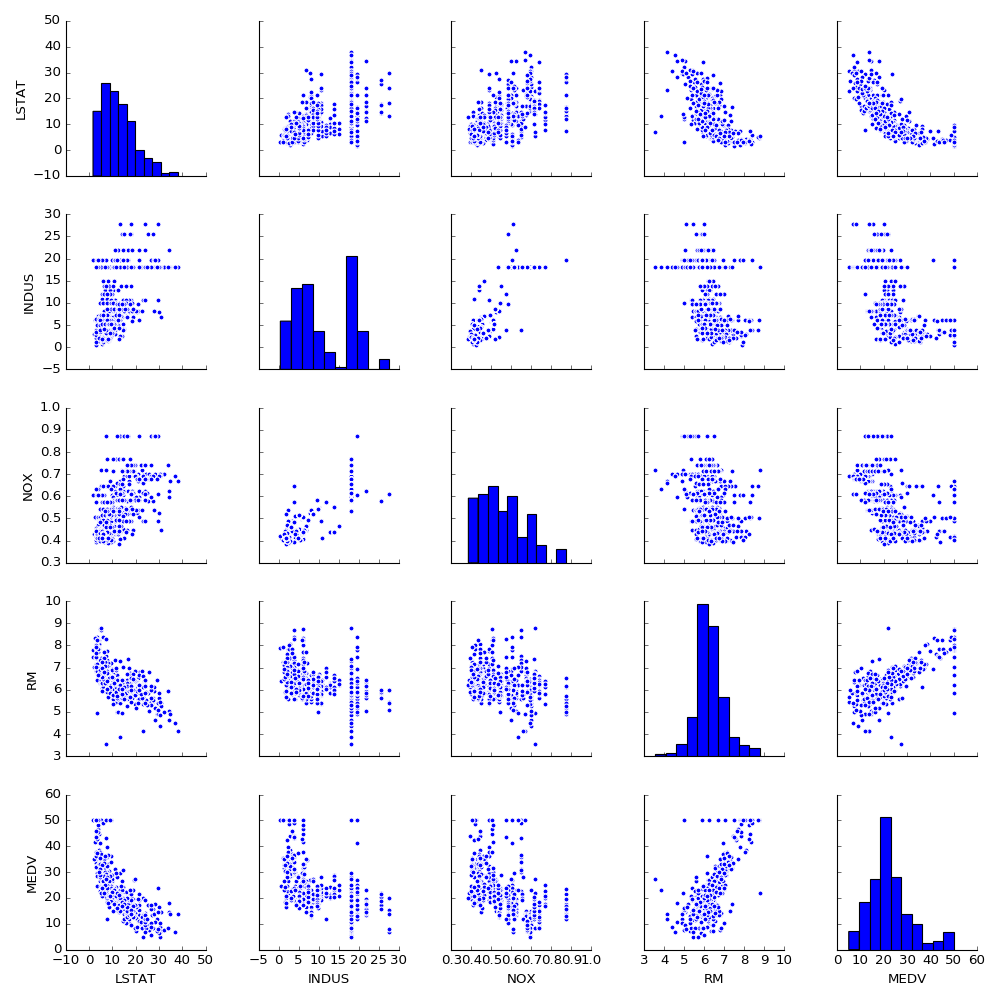

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
cols = ['LSTAT','INDUS', 'NOX','RM','MEDV'] 
sns.pairplot(df[cols],size=2.5) 
plt.tight_layout() 
plt.show()

<IPython.core.display.Javascript object>


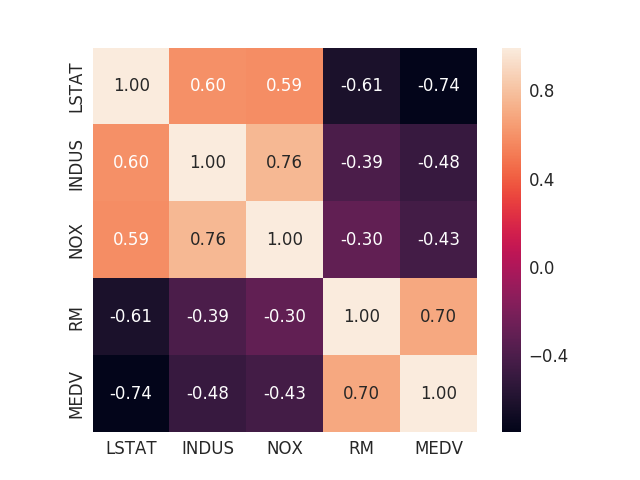

In [7]:
import numpy as np 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5) 
hm = sns.heatmap(cm,cbar = True,annot = True , square = True , fmt ='.2f',annot_kws ={'size':15},yticklabels=cols,xticklabels = cols
                )
plt.show()

In [23]:
X = df[['RM']].values 
y = df['MEDV'].values 



In [24]:
X[:5]

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147]])

In [25]:
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [27]:
from sklearn.preprocessing import StandardScaler 

sc_x = StandardScaler() 
sc_y = StandardScaler() 

X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [28]:
X_std[:5]

array([[ 0.41367189],
       [ 0.19427445],
       [ 1.28271368],
       [ 1.01630251],
       [ 1.22857665]])

In [29]:
y_std[:5]

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288])

In [30]:
lr = linear_regression.LinearRegressionGD() 
lr.fit(X_std,y_std) 


<IPython.core.display.Javascript object>


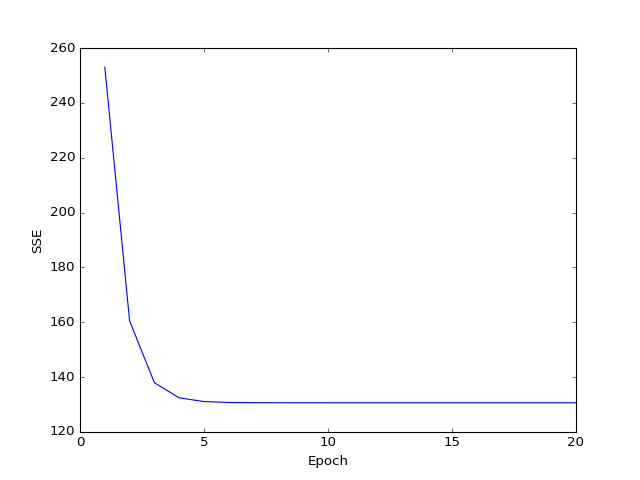

In [31]:
sns.reset_orig() #resets matplotlib style 

plt.plot(range(1,lr.n_iter+1),lr.cost_) 
plt.ylabel('SSE')
plt.xlabel('Epoch') 
plt.show()

In [34]:
def lin_regplot(X , y , model):
    plt.scatter(X,y,c='steelblue',edgecolor ='white',s=70)
    plt.plot(X,model.predict(X) , color ='black' ,lw=2)
    return None

<IPython.core.display.Javascript object>


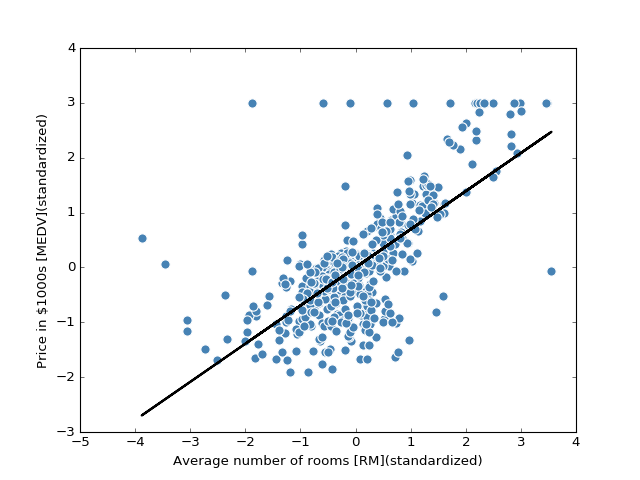

In [35]:
lin_regplot(X_std,y_std,lr) 
plt.xlabel('Average number of rooms [RM](standardized)')
plt.ylabel('Price in $1000s [MEDV](standardized)') 
plt.show()

In [37]:
num_rooms_std = sc_x.transform([[5.0]]
                              ) 
price_std = lr.predict(num_rooms_std)
print("Price in $1000s : %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s : 10.840


In [38]:
print('Slope : %.3f' % lr.w_[1]) 


Slope : 0.695


In [39]:
print('Intercept : %.3f' % lr.w_[0])

Intercept : -0.000


# Estimating coefficient of a regression model via scikit-learn 

In [40]:
from sklearn.linear_model import LinearRegression 
slr = LinearRegression()
slr.fit(X,y) 
print('Slope : %.3f' % slr.coef_[0]) 
print('Intercept : %.3f' % slr.intercept_)

Slope : 9.102
Intercept : -34.671


<IPython.core.display.Javascript object>


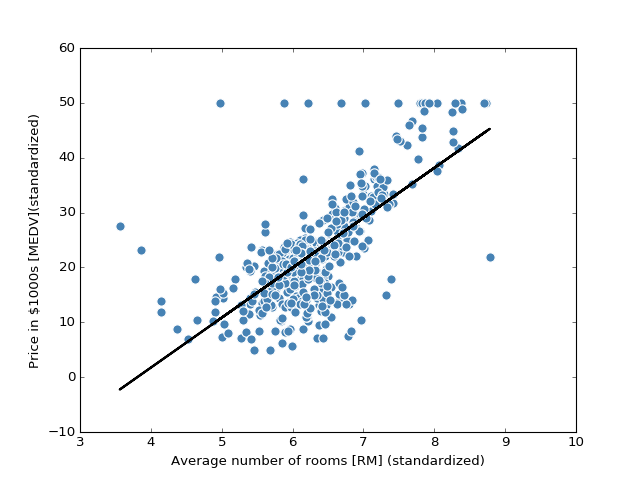

In [41]:
lin_regplot(X,y,slr) 
plt.xlabel('Average number of rooms [RM] (standardized)') 
plt.ylabel('Price in $1000s [MEDV](standardized)') 
plt.show()

# Fitting a robust regression model using RANSAC 

In [42]:
from sklearn.linear_model import RANSACRegressor 
ransac = RANSACRegressor(LinearRegression(),
                         max_trials =100,
                         min_samples = 50,
                        loss = 'absolute_loss',
                        residual_threshold = 5.0,
                         random_state =0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

<IPython.core.display.Javascript object>


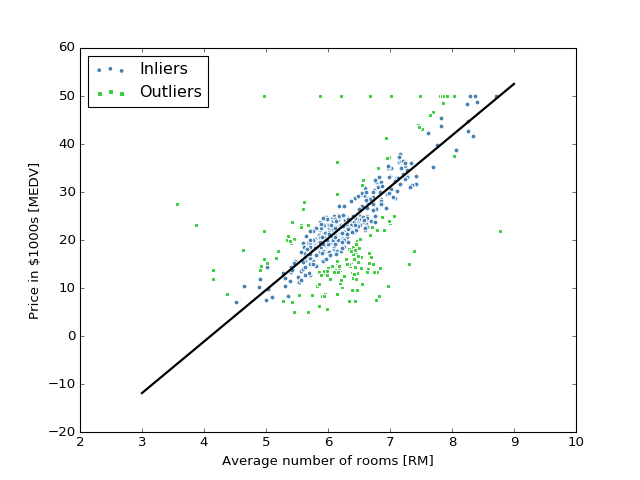

In [51]:
inlier_mask = ransac.inlier_mask_ 
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3,10,1)

line_y_ransac = ransac.predict(line_X[:,np.newaxis])

plt.scatter(X[inlier_mask],y[inlier_mask], c = 'steelblue',edgecolor ='white',marker ='o',label = 'Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white' , marker ='s',label = 'Outliers') 
plt.plot(line_X,line_y_ransac,color = 'black',lw =2 ) 
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [52]:
print('Slope : %.3f' % ransac.estimator_.coef_[0]) 
print('Intercept : %.3f' % ransac.estimator_.intercept_)

Slope : 10.735
Intercept : -44.089


# Evaluating performance of linear regression models

In [55]:
from sklearn.model_selection import train_test_split 
X = df.iloc[:,:-1].values
y = df['MEDV'].values 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train) 
y_test_pred = slr.predict(X_test)

<IPython.core.display.Javascript object>


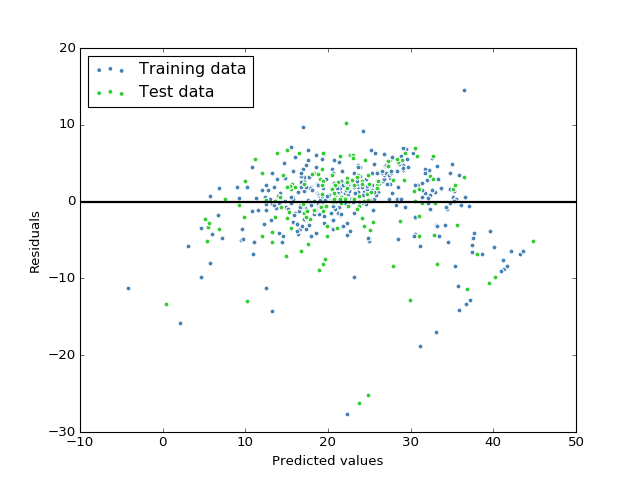

In [59]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker ='o',edgecolor='white',label='Training data') 
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker ='o',edgecolor='white',label='Test data') 
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

# MSE and R**2

In [60]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error 
print('MSE train : %.3f , test : %.3f' %(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train : 19.958 , test : 27.196


In [61]:
# R**2 
from sklearn.metrics import r2_score
print('R^2 train: %.3f , test : %.3f' % (r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

R^2 train: 0.765 , test : 0.673


# Using regularized methods for regression

In [63]:
from sklearn.linear_model import Ridge 
ridge = Ridge(alpha=1.0) 

from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=1.0) 

from sklearn.linear_model import ElasticNet 
elanet = ElasticNet(alpha=1.0,l1_ratio=0.5)

# Turning a linear regression model into a curve polynomial regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures 

In [72]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [73]:
lr = LinearRegression() 
pr = LinearRegression() 
quadratic = PolynomialFeatures(degree=2) 
X_quad = quadratic.fit_transform(X)

In [76]:
## Fit a simple regression model for comparison 
lr.fit(X,y) 
X_fit =np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [77]:
## Fit a multiple regression model on the transformed features for polynomial regression 
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

<IPython.core.display.Javascript object>


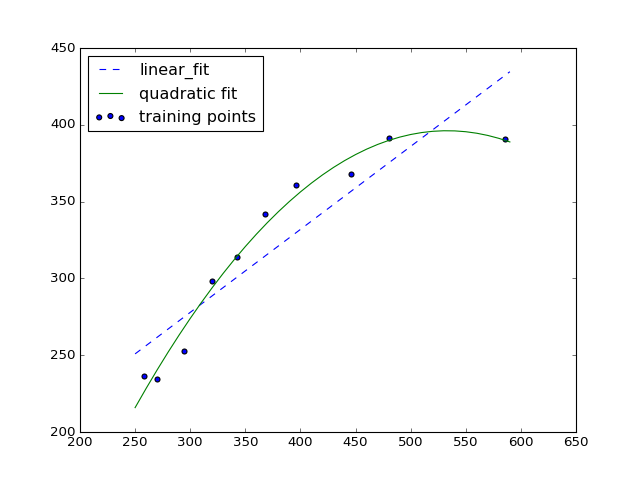

In [80]:
## plot the results  
plt.scatter(X,y,label ='training points') 
plt.plot(X_fit,y_lin_fit,label='linear_fit',linestyle='--') 
plt.plot(X_fit,y_quad_fit,label='quadratic fit')
plt.legend(loc='upper left') 
plt.show()

In [81]:
y_lin_pred = lr.predict(X) 
y_quad_pred = pr.predict(X_quad) 
print('Training MSE linear : %.3f , quadratic : %.3f' % (mean_squared_error(y,y_lin_pred),mean_squared_error(y,y_quad_pred)))

Training MSE linear : 569.780 , quadratic : 61.330


In [82]:
print ('Traininh R^2 linear: %.3f , quadratic : %.3f' %(r2_score(y,y_lin_pred),r2_score(y,y_quad_pred)))

Traininh R^2 linear: 0.832 , quadratic : 0.982


# Modeling nonlinear relationships in the housing dataset

In [85]:
X = df[['LSTAT']].values 
y = df['MEDV'].values 

regr = LinearRegression() 

# create quadratic features

quadratic = PolynomialFeatures(degree=2) 
cubic = PolynomialFeatures(degree=3) 

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features  

X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis] 

# Linear 

regr = regr.fit(X,y) 
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X)) 

#Quaratic 
regr = regr.fit(X_quad,y) 
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad)) 


#Cubic 
regr = regr.fit(X_cubic,y) 
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic)) 

<IPython.core.display.Javascript object>


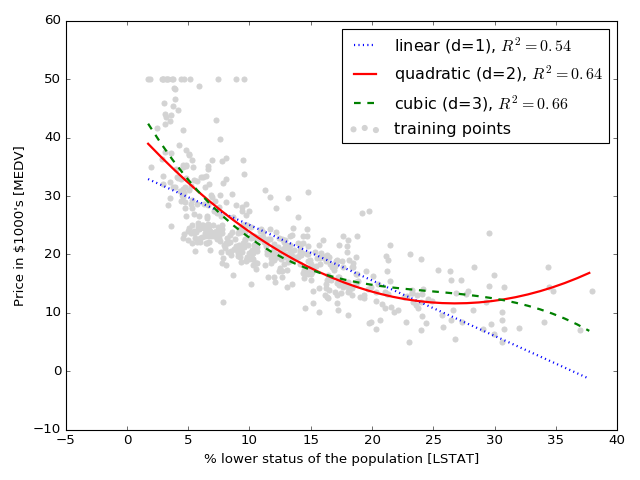

In [86]:
# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('./figures/polyhouse_example.png', dpi=300)
plt.show()

# Transforming features 

In [89]:
X_log =np.log(X)
y_sqrt = np.sqrt(y)

In [91]:
#fit_features 

X_fit = np.arange(X_log.min()-1,X_log.max()+1,1)[:,np.newaxis]
regr = regr.fit(X_log,y_sqrt) 
y_lin_fit = regr.predict(X_fit)

linear_r2 = r2_score(y_sqrt,regr.predict(X_log)) 




<IPython.core.display.Javascript object>


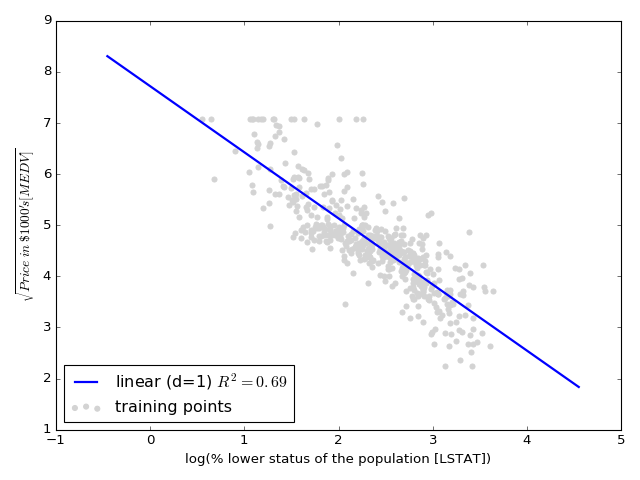

In [94]:
# plot results 
plt.scatter(X_log,y_sqrt,label='training points',color ='lightgray') 
plt.plot(X_fit,y_lin_fit,label='linear (d=1) $R^2 = %.2f$'% (linear_r2), color = 'blue',lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])') 
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
# plt.savefig('./figures/transform_example.png', dpi=300)
plt.show()


# Dealing with nonlinear relationships using random forests

<IPython.core.display.Javascript object>


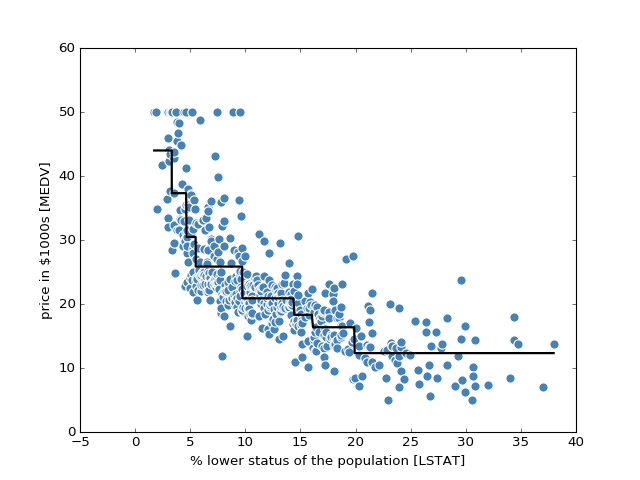

In [95]:
#DecisionTree

from sklearn.tree import DecisionTreeRegressor 
X = df[['LSTAT']].values 
y = df['MEDV'].values 
tree= DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort() 
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('% lower status of the population [LSTAT]') 
plt.ylabel('price in $1000s [MEDV]') 
plt.show()

In [97]:
# RandomForest 

X = df.iloc[:,:-1].values 
y = df['MEDV'].values 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1) 

from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor(n_estimators=1000,criterion ='mse',random_state=1,n_jobs=-1) 
forest.fit(X_train,y_train) 

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test) 






In [102]:
print('MSE train: %.3f , test: %.3f' %(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)))


print('R^2 train : %.3f,test: %.3f' %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 1.642 , test: 11.052
R^2 train : 0.979,test: 0.878


<IPython.core.display.Javascript object>


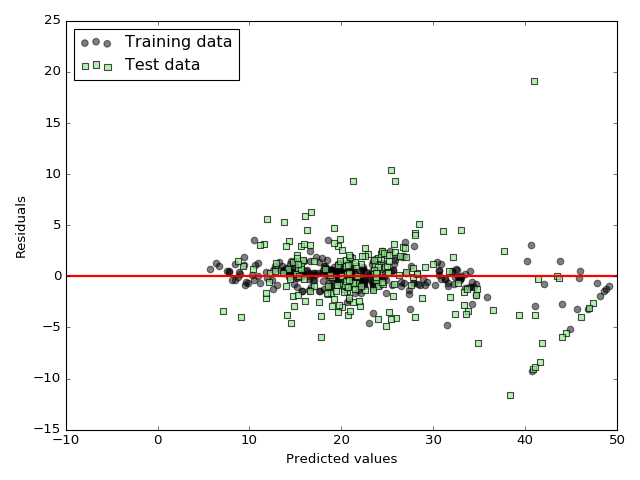

In [103]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()